## Introduction to plotting

#### In this notebook we cover `xarray` data plotting functionality for generating simple and quick plots from multi-dimensional datasets. 
#### The DEA Python library also provides a custom plotting module with additional convenient functionality.

In [2]:
%matplotlib inline

import datacube
from check_answer import check_answer
import sys

sys.path.append("./Scripts")
from dea_plotting import display_map
from dea_plotting import rgb

dc = datacube.Datacube(app="Plotting")

/env/lib/python3.6/site-packages/geopandas/_compat.py:110: UserWarning: The Shapely GEOS version (3.7.2-CAPI-1.11.0 ) is incompatible with the GEOS version PyGEOS was compiled with (3.9.1-CAPI-1.14.2). Conversions between both will be slow.
  shapely_geos_version, geos_capi_version_string
/env/lib/python3.6/site-packages/datacube/drivers/postgres/_connections.py:87: SADeprecationWarning: Calling URL() directly is deprecated and will be disabled in a future release.  The public constructor for URL is now the URL.create() method.
  username=username, password=password,


#### The `display_map()` function is provided in the DEA environment for interactively visualising the geographical extents of a query. It uses the Leaflet web mapping library presenting the output inside Jupyter notebooks. This function provides a convenient way of checking that the boundaries in your query correspond to the right location.

In [4]:
lat_range = (-27.58, -27.666)
lon_range = (153.3, 153.5)

display_map(x=lon_range, y=lat_range)

#### The variables specified above can used in a query to load data from the DEA datacube using `dc.load()`.

In [22]:
ds = dc.load(product="ls8_nbart_geomedian_annual",
             x=lon_range,
             y=lat_range,
             time=("2015", "2019"))

ds

<xarray.Dataset>
Dimensions:      (time: 5, x: 835, y: 512)
Coordinates:
  * time         (time) datetime64[ns] 2015-01-01 2016-01-01 ... 2019-01-01
  * y            (y) float64 -3.165e+06 -3.165e+06 ... -3.177e+06 -3.177e+06
  * x            (x) float64 2.066e+06 2.066e+06 ... 2.087e+06 2.087e+06
    spatial_ref  int32 3577
Data variables:
    blue         (time, y, x) int16 287 293 289 299 309 ... 331 347 328 325 349
    green        (time, y, x) int16 394 401 386 398 407 ... 219 230 219 218 234
    red          (time, y, x) int16 310 314 300 308 309 ... 145 153 143 141 157
    nir          (time, y, x) int16 2606 2611 2588 2611 2682 ... 129 116 117 133
    swir1        (time, y, x) int16 1004 1033 989 984 1006 ... 90 94 89 82 96
    swir2        (time, y, x) int16 429 447 427 427 431 417 ... 72 78 73 67 79
Attributes:
    crs:           EPSG:3577
    grid_mapping:  spatial_ref

In [6]:
da = ds.swir1.sel(time='2017')

da

<xarray.DataArray 'swir1' (time: 1, y: 512, x: 835)>
array([[[1058, 1062,  985, ...,  130,  132,  147],
        [1058, 1053,  965, ...,  132,  160,  191],
        [1085, 1036,  947, ...,  126,  161,  177],
        ...,
        [1079,  816,  738, ...,   95,   90,   85],
        [1118,  722,  540, ...,   92,   91,   84],
        [1492, 1207,  845, ...,   93,   95,   88]]], dtype=int16)
Coordinates:
  * time         (time) datetime64[ns] 2017-01-01
  * y            (y) float64 -3.165e+06 -3.165e+06 ... -3.177e+06 -3.177e+06
  * x            (x) float64 2.066e+06 2.066e+06 ... 2.087e+06 2.087e+06
    spatial_ref  int32 3577
Attributes:
    units:         1
    nodata:        -999
    crs:           EPSG:3577
    grid_mapping:  spatial_ref

#### Exercise 3.1: If you remember from the XArray tutorial, there are two different ways of selecting parts of Datasets and DataArrays. First uses `.sel()` to when we want to pass values for the dimensions and `.isel()` when we want to pass positional indexes. Can you request the same temporal slice as in the example above but using `.isel()` this time? 

In [ ]:
answ = ds.?.isel(?)

check_answer("DEA3.1", str(answ.time.values)[:4])

#### The plotting functionality that we saw in the XArray tutorial also applies to DEA Datasets:

>Tip: Remember that for plotting we always need to select one temporal element from the Dataset.

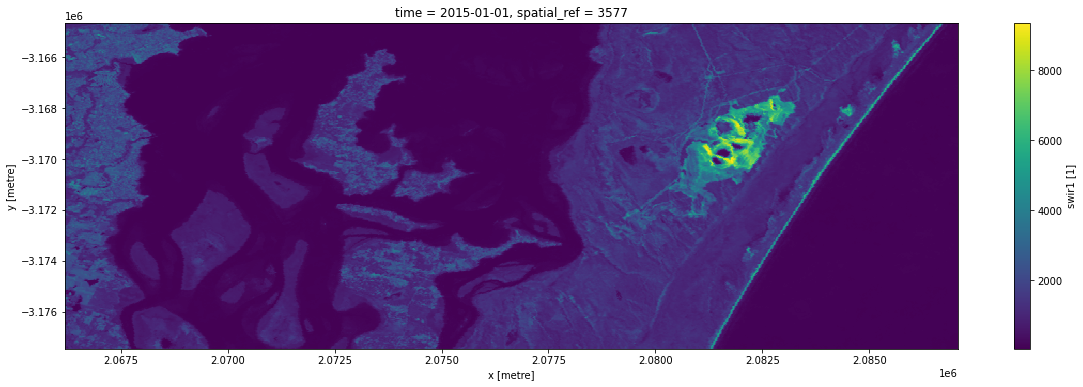

In [29]:
ds.swir1.isel(time=0).plot(figsize=(20, 6))

#### Exercise 3.2: Can you create a plot for the red channel in 2018?

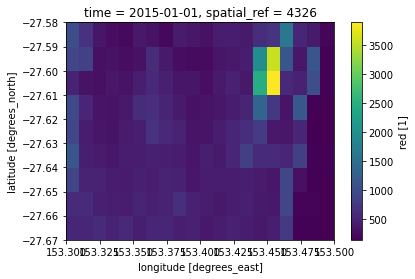

In [20]:


ds.red.isel(time=0).plot()

#### It is often useful to produce plots for a single measurement across time, for example to compare change between satellite observations or summary datasets. To plot multiple images, skip the `isel()` step above and plot the entire `xarray.DataArray` directly. 

#### To plot multiple timesteps in one figure, it is necessary to instruct the `.plot()` function to put each timestep in a different column. This is done by specifying `.plot(col="time")`:

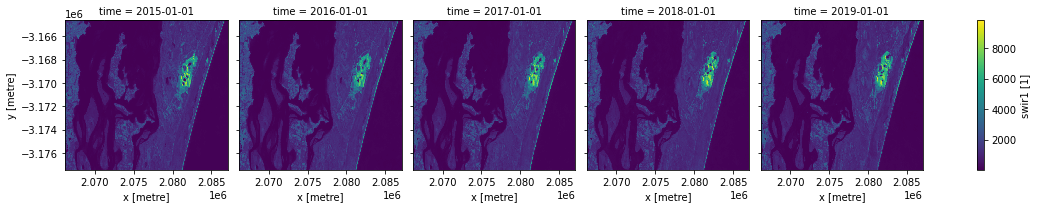

In [10]:
ds.swir1.plot(col="time")

>Note: This kind of plotting is called "facetted plotting". For more information, refer to the [xarray documentation](http://xarray.pydata.org/en/stable/plotting.html#faceting)

#### The plots above are dark and difficult to see details in them. To improve the appearance of `xarray` plots, use the `robust=True` argument to optimise the plot colours by clipping extreme values or outliers. This will use the 2nd and 98th percentiles of the data to compute the color limits:

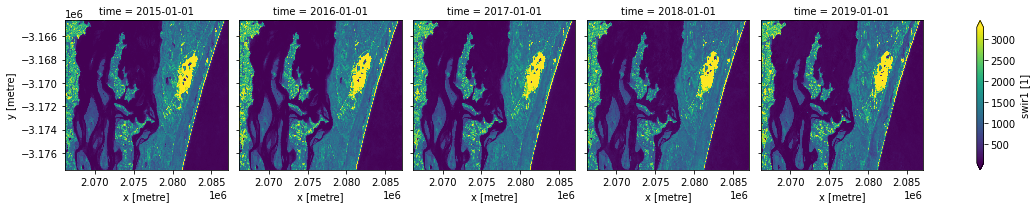

In [11]:
ds.swir1.plot(col="time", robust=True)

#### Plots can be further customised by adding custom colour maps/styles using the `cmap` parameter. When choosing a colour map for a plot, it is important to choose a set of colours that are perceived logically by the human eye. The best colour maps are "perceptually uniform": these colour maps increase logically from dark to light colours, where equal increases in lightness/darkness correspond to equal changes in data values. Some best-practice perceptually uniform colour maps include:

```
"viridis", "plasma", "inferno", "magma", "cividis"
```

> For further reading about perceptually uniform colour maps in data visualisation, refer to the [matplotlib documentation](https://matplotlib.org/3.1.0/tutorials/colors/colormaps.html)

#### It is also important to consider colour blindness when selecting a colour map. `XArray` supports many colour maps from the "colorbrewer" family of colour maps which are optimised for colour blindness. You can use the interactive [online tool](http://colorbrewer2.org) to browse all available colour maps, or choose from one of the following commonly used options:

```
"Greys", "Purples", "Blues", "Greens", "Oranges", "Reds",
"YlOrBr", "YlOrRd", "OrRd", "PuRd", "RdPu", "BuPu", 
"GnBu", "PuBu", "YlGnBu", "PuBuGn", "BuGn", "YlGn"
```

#### For a full list of available colour maps you can refer to [this list](https://matplotlib.org/3.1.0/tutorials/colors/colormaps.html). The example cell below plots the data with the perceptually uniform `magma` colour map:

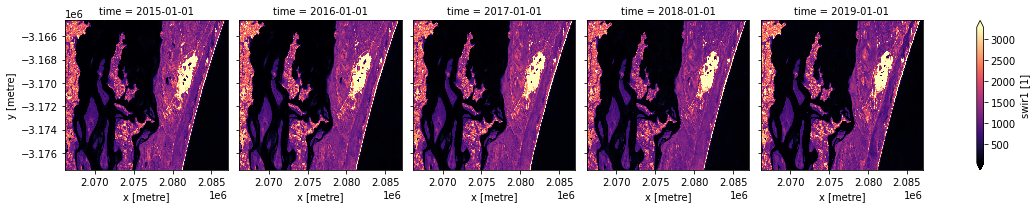

In [12]:
ds.swir1.plot(col="time", robust=True, cmap="magma")

#### Exercise 3.3: Experiment with the previous colour maps and create different displays with the contents of the dataset.

In [19]:
ds = dc.load(product="ls8_nbart_geomedian_annual", 
             x=lon_range, 
             y=lat_range, 
             output_crs='EPSG:4326', 
             resolution = (0.01,0.01), 
             time=("2015", "2019"))

ds

<xarray.Dataset>
Dimensions:      (latitude: 9, longitude: 20, time: 5)
Coordinates:
  * time         (time) datetime64[ns] 2015-01-01 2016-01-01 ... 2019-01-01
  * latitude     (latitude) float64 -27.67 -27.66 -27.65 ... -27.61 -27.6 -27.59
  * longitude    (longitude) float64 153.3 153.3 153.3 ... 153.5 153.5 153.5
    spatial_ref  int32 4326
Data variables:
    blue         (time, latitude, longitude) int16 397 433 478 ... 373 272 404
    green        (time, latitude, longitude) int16 604 619 644 ... 534 428 363
    red          (time, latitude, longitude) int16 543 543 584 ... 517 358 147
    nir          (time, latitude, longitude) int16 2841 1197 611 ... 2611 116
    swir1        (time, latitude, longitude) int16 1603 473 236 ... 1548 1033 74
    swir2        (time, latitude, longitude) int16 840 251 134 ... 875 529 60
Attributes:
    crs:           EPSG:4326
    grid_mapping:  spatial_ref

#### Although `XArray` makes it easy to plot single band images, plotting a three band RGB colour image is less straightforward. If you recall the not easy to remember chain of methods that we have been using previously:

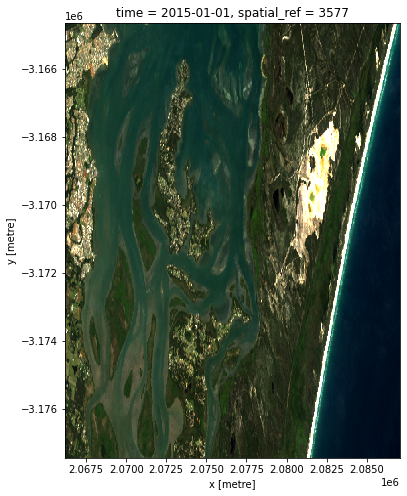

In [31]:
ds[['red', 'green', 'blue']].isel(time=0).to_array().plot.imshow(robust=True, figsize=(6,8))

#### To make the previous process easier, the [dea-notebooks repository](https://github.com/GeoscienceAustralia/dea-notebooks) provides a custom `rgb()` function that is designed for plotting three band images. The `rgb()` function maps three data variables/measurements from the loaded dataset to the red, green and blue channels that are used to make a three-colour image.

#### The `rgb()` It requires the minimum input of:

* `ds:` The `xarray.Dataset` object
* `bands:` Three bands for display (these must be measurements found in the dataset) 
* `index:` The timestep to view, default is `0`

#### For example for plotting a single timestep:

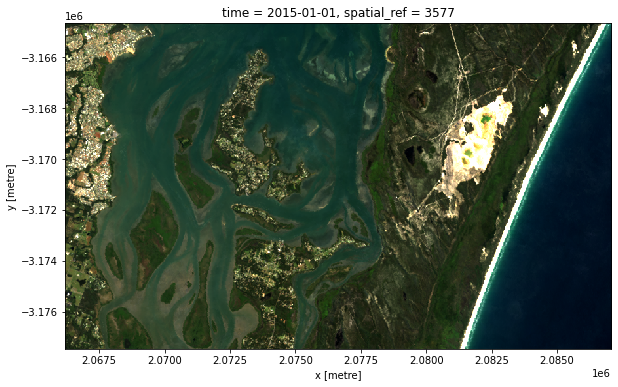

In [32]:
# View a red, green, blue (true colour) image of the first timestep
rgb(ds, bands=["red", "green", "blue"], index=0)

#### Exercise 3.4: Can you create a false colour image, with the following mapping (`swir1`, `nir`, `green`)?

"Sorry, that doesn't seem right. Think a little bit more and try again"

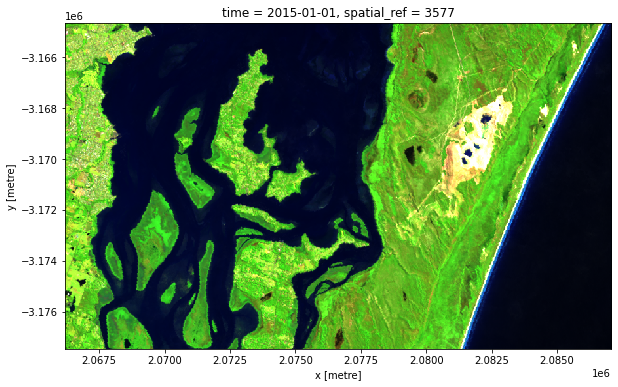

In [33]:
answ = ['swir1', 'nir', 'green']

rgb(ds, bands=answ, index=0)

check_answer("DEA4.4", answ)

#### The `rgb()` function can also do display multiple timesteps, as long as a list of timesteps to view is provided to the `index` argument, e.g. `index=[X1, X2, ...]`. The example cell below plots the first and fifth image in the dataset using `index=[0, 4]` (remembering that counting in Python starts at 0):

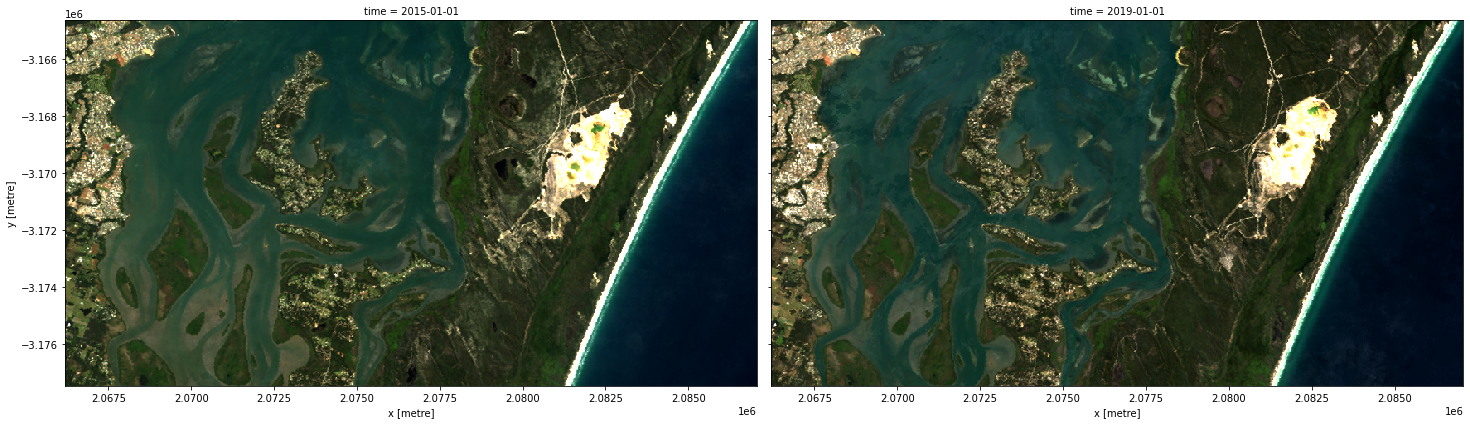

In [35]:
rgb(ds, bands=['red', 'green', 'blue'], index=[0, 4])

It is also possible to use `rgb()` to plot all timesteps in a dataset using the `col="time"` syntax demonstrated in the [single band example above](#Plotting-multiple-timesteps): 

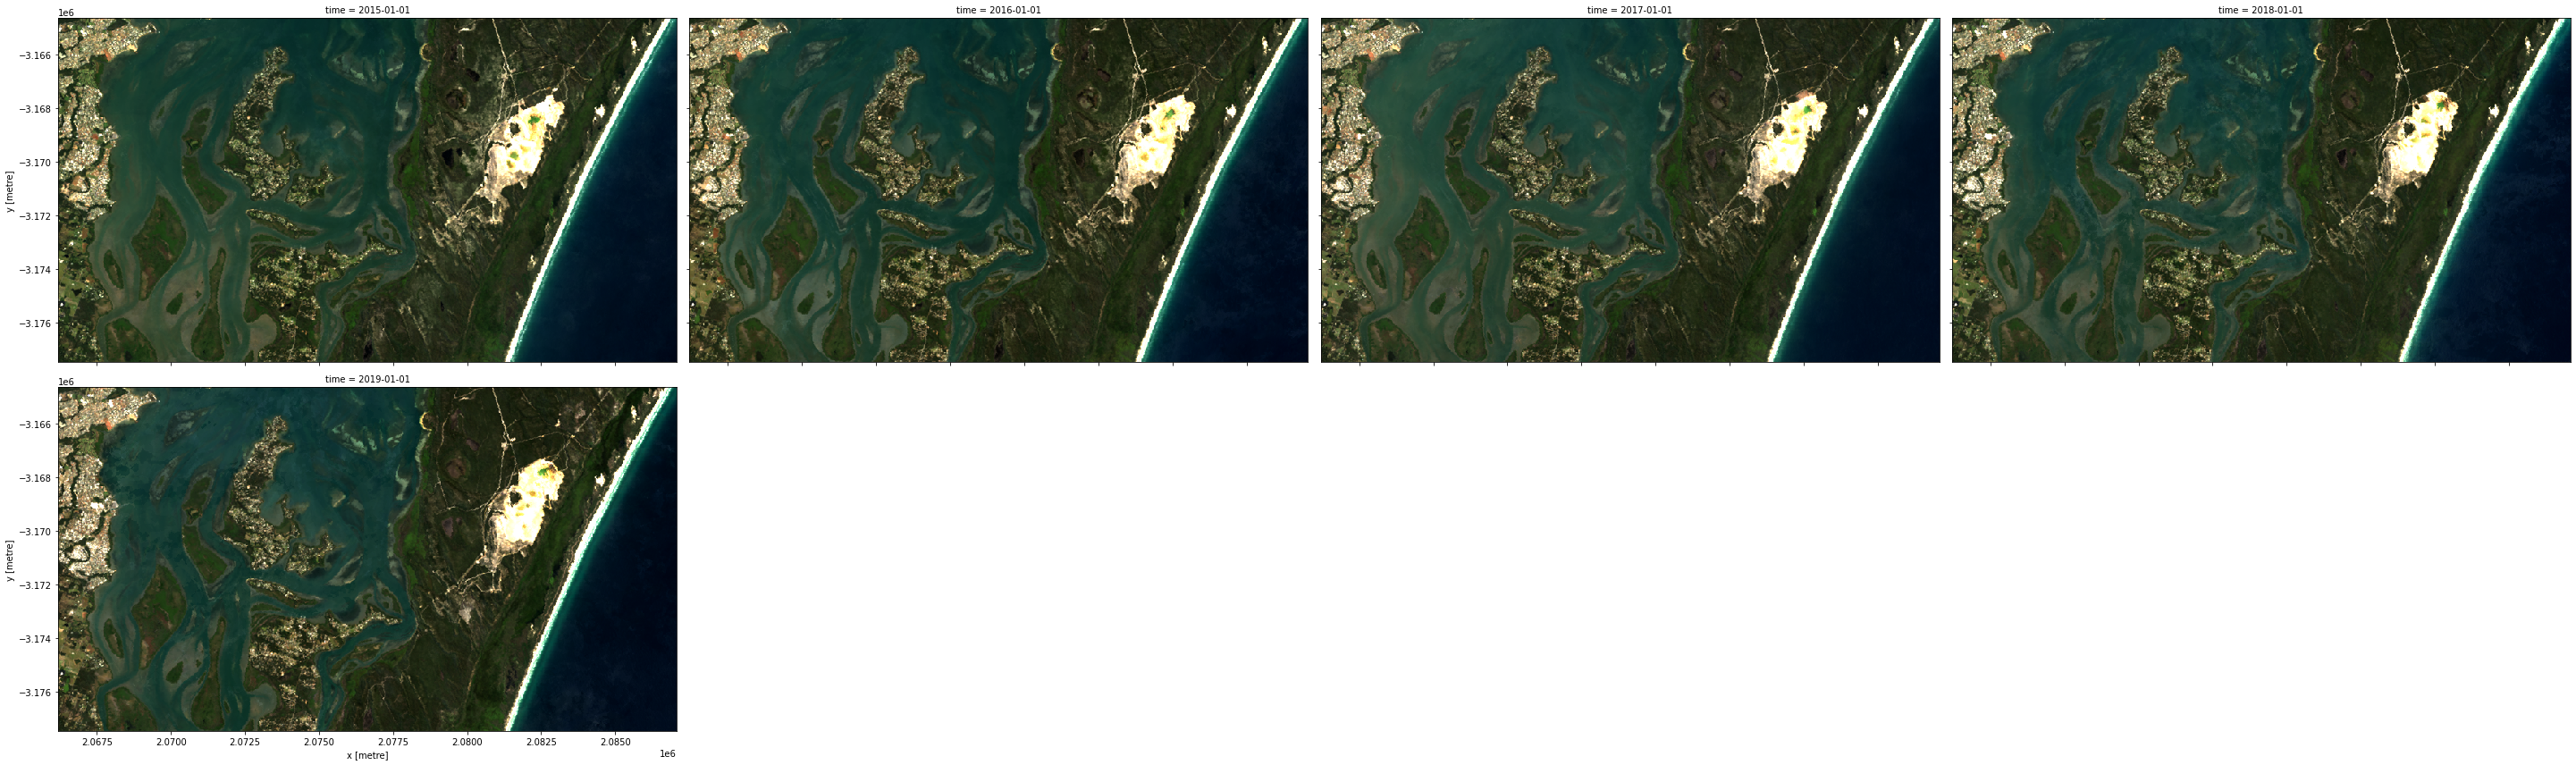

In [36]:
rgb(ds, bands=['red', 'green', 'blue'], col="time")

#### By default, `rgb()` generates plots with `robust=True` to improve the appearance of the images by clipping out the darkest and brightest 2% of pixels, using the 2nd and 98th percentiles of the data to compute the colour limits

#### If this default provides poor results, the plot's colour stretch can be customised using the `percentile_stretch` parameter. This clips the most extreme minimum and maximum values in the dataset, improving the contrast and appearance of the plot. For example, specifying `percentile_stretch=[0.05, 0.95]` will clip out the darkest and brightest 5% of pixels, focusing the colour stretch on the remaining 90% of less extreme values:

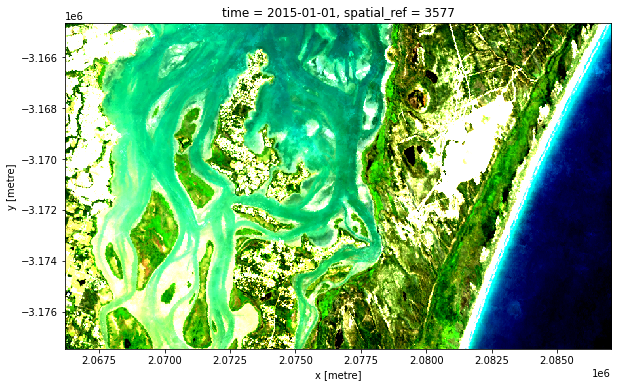

In [39]:
rgb(ds, 
    bands=['red', 'green', 'blue'], 
    index=0, 
    percentile_stretch=[0.2, 0.8])

#### Exercise 3.5: Can you create an NDVI composite from the previous dataset and use the `.plot()` using the `summer_r` cmap and passing `'time'` to the col parameter?

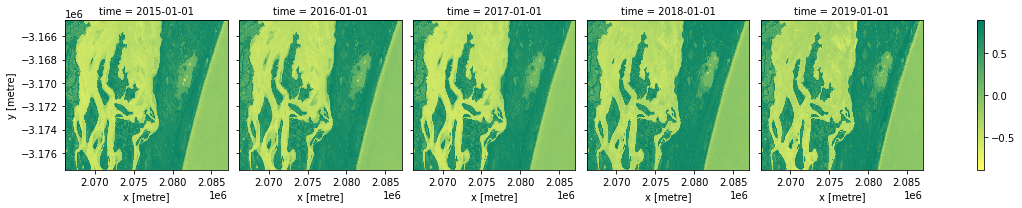

In [40]:
def calc_ndvi(ds): 
    return (ds.nir - ds.red) / (ds.red + ds.nir) 

ndvi = calc_ndvi(ds)

ndvi.plot(cmap='summer_r', col='time')

#### Disclaimer: The original notebook for this tutorial has been taken from the Sandbox `Beginners_guide` folder. Refer to the conditions specified in the original notebook and for updated versions of the code.